In [1]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float32'))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float32'))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float32'))

    precision = tp / (tp + fp + 1e-7)
    recall = tp / (tp + fn + 1e-7)

    return 2 * (precision * recall) / (precision + recall + 1e-7)

In [2]:
import pandas as pd

X_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainX.csv")
y_train = pd.read_csv("./Dataset/Training/CIC_IDS_2017_trainY.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[6.75974670e-03, 3.62594136e-03, 4.55046005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 7.05769050e-01, 2.27523003e-05, ...,
        0.00000000e+00, 7.04166667e-01, 7.04166667e-01],
       [3.10521096e-02, 7.49999938e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22072175e-03, 6.44914946e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.17174029e-04, 7.99999933e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 6.75271860e-01, 3.18532204e-05, ...,
        5.56148423e-01, 5.88333333e-01, 8.44348833e-02]])

In [4]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_train_reshaped

array([[[6.75974670e-03],
        [3.62594136e-03],
        [4.55046005e-05],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [7.05769050e-01],
        [2.27523003e-05],
        ...,
        [0.00000000e+00],
        [7.04166667e-01],
        [7.04166667e-01]],

       [[3.10521096e-02],
        [7.49999938e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22072175e-03],
        [6.44914946e-03],
        [9.10092010e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[7.17174029e-04],
        [7.99999933e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22072175e-03],
        [6.75271860e-01],
        [3.18532204e-05],
        ...,
        [5.56148423e-01],
        [5.8833

In [5]:
X_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testX.csv")
y_test = pd.read_csv("./Dataset/Testing/CIC_IDS_2017_testY.csv")

In [6]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[8.08740501e-04, 7.10891637e-04, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22074038e-03, 8.59988298e-03, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.71565905e-01, 5.66666643e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22074038e-03, 7.09986887e-02, 1.37201187e-05, ...,
        0.00000000e+00, 7.09981750e-02, 7.09981750e-02],
       [8.08740501e-04, 2.22499991e-06, 4.57337291e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.98672445e-02, 1.14999995e-06, 9.14674582e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
X_test_reshaped

array([[[8.08740501e-04],
        [7.10891637e-04],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.22074038e-03],
        [8.59988298e-03],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[5.71565905e-01],
        [5.66666643e-07],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[1.22074038e-03],
        [7.09986887e-02],
        [1.37201187e-05],
        ...,
        [0.00000000e+00],
        [7.09981750e-02],
        [7.09981750e-02]],

       [[8.08740501e-04],
        [2.22499991e-06],
        [4.57337291e-06],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[4.98672445e-02],
        [1.14999995e-06],
        [9.14674582e-06],
        ...,
        [0.00000000e+00],
        [0.0000

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import lightgbm as lgb

cnn_model = keras.models.load_model("./Models/Base_CNN.h5", custom_objects={"f1_score": f1_score})
lstm_model = keras.models.load_model("./Models/Base_LSTM.h5", custom_objects={"f1_score": f1_score})
transformer_model = keras.models.load_model("./Models/Base_Transformer_model_clean", compile=False)  # folder format

base_models = [cnn_model, lstm_model, transformer_model]


import numpy as np
from tqdm import tqdm
import tensorflow as tf

In [12]:
# Defining a function for MC Dropout predictions

def mc_dropout_predict_batched(model, X, n_samples=10, batch_size=2048):
    predictions = []

    for _ in range(n_samples):
        batch_preds = []
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            preds = model(X_batch, training=True)  # Dropout active
            batch_preds.append(preds.numpy())
        batch_preds = np.concatenate(batch_preds, axis=0)
        predictions.append(batch_preds)
    
    predictions = np.stack(predictions, axis=0)  # [n_samples, num_examples, 1]
    mean_pred = predictions.mean(axis=0)
    std_pred = predictions.std(axis=0)
    return mean_pred, std_pred

In [16]:
# Defining a function to generate meta-features for ensemble training 

def generate_meta_features(base_models, X, n_samples=10, batch_size=2048):
    """
    Generate meta-features for ensemble training using MC Dropout.
    
    Args:
        base_models: list of Keras models [cnn_model, lstm_model, transformer_model]
        X: Input data array
        n_samples: MC Dropout forward passes
        batch_size: batch size to avoid memory issues

    Returns:
        meta_features: np.array of shape [num_examples, num_base_models]
        uncertainties: np.array of shape [num_examples, num_base_models]
    """
    meta_features = []
    uncertainties = []

    for model in base_models:
        mean_pred, std_pred = mc_dropout_predict_batched(model, X, n_samples=n_samples, batch_size=batch_size)
        meta_features.append(mean_pred)
        uncertainties.append(std_pred)
    
    meta_features = np.concatenate(meta_features, axis=1)  # shape: [num_examples, num_models]
    uncertainties = np.concatenate(uncertainties, axis=1)
    return meta_features, uncertainties

In [17]:
# Example: X_train, X_val, X_test are your input arrays
base_models = [cnn_model, lstm_model, transformer_model]

meta_X_train, meta_uncertainties_train = generate_meta_features(
    base_models,       
    X_train_reshaped,  
    n_samples=10,
    batch_size=2048
)

meta_X_val, meta_uncertainties_val = generate_meta_features(
    base_models,
    X_test_reshaped,
    n_samples=10,
    batch_size=2048
)

meta_X_test, meta_uncertainties_test = generate_meta_features(
    base_models,
    X_test_reshaped,
    n_samples=10,
    batch_size=2048
)

In [18]:
# Temperature Scaling (Calibration)
class TemperatureScaling(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.temperature = tf.Variable(1.0, dtype=tf.float32, trainable=True)

    def call(self, logits):
        return logits / self.temperature

# Fit temperature on validation logits
temp_scaler = TemperatureScaling()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
# Assume y_val contains true labels
logits_val = meta_X_val  # meta-features treated as logits for binary classification
# y_val_tensor = tf.convert_to_tensor(y_test.reshape(-1, 1), dtype=tf.float32)

y_val_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

for epoch in range(100):
    with tf.GradientTape() as tape:
        scaled = temp_scaler(logits_val)
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_val_tensor, tf.sigmoid(scaled)))
    grads = tape.gradient(loss, temp_scaler.trainable_variables)
    optimizer.apply_gradients(zip(grads, temp_scaler.trainable_variables))

# Applying temperature scaling to meta-test features
meta_X_test_scaled = temp_scaler(meta_X_test)


# Meta-learner (LightGBM)
meta_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31
)

meta_model.fit(meta_X_train, y_train, eval_set=[(meta_X_val, y_test)])

final_preds = meta_model.predict_proba(meta_X_test_scaled)[:, 1]  # probability scores

C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Number of positive: 1403639, number of negative: 1403639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 2807278, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

y_pred_probs = meta_model.predict(meta_X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

In [26]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 score:  {f1:.4f}")

Accuracy:  0.9839
Precision: 0.9177
Recall:    0.9936
F1 score:  0.9541


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9987    0.9819    0.9902    691418
           1     0.9177    0.9936    0.9541    140446

    accuracy                         0.9839    831864
   macro avg     0.9582    0.9877    0.9722    831864
weighted avg     0.9850    0.9839    0.9841    831864



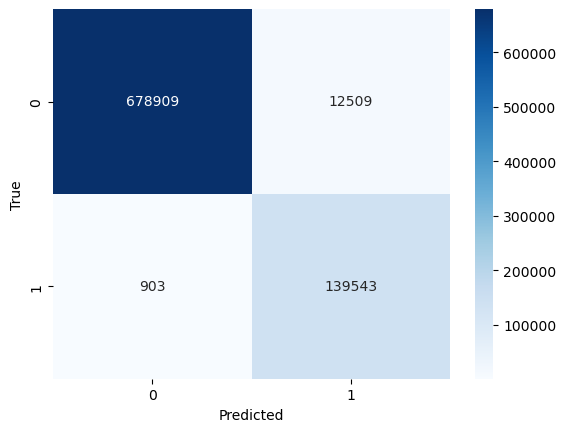

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [29]:
cnn_model.save("./Models/Pipeline/cnn_base.h5")
lstm_model.save("./Models/Pipeline/lstm_base.h5")
transformer_model.save("./Models/Pipeline/transformer_base")   # folder

import lightgbm as lgb
meta_model.booster_.save_model("Models/Meta_LGBM.txt")

# Save temperature scaling parameter
import numpy as np
np.save("./Models/Pipeline/temperature_scale.npy", [temperature])


INFO:tensorflow:Assets written to: ./Models/Pipeline/transformer_base\assets


INFO:tensorflow:Assets written to: ./Models/Pipeline/transformer_base\assets


NameError: name 'temperature' is not defined

In [32]:
# Extract scalar temperature value
temperature = float(temp_scaler.temperature.numpy())

# Save to file
np.save("./Models/Pipeline/temperature_scale.npy", [temperature])

print("Saved temperature =", temperature)


Saved temperature = 0.5753742456436157
